In [52]:
import numpy as np
import scipy.io as sio
from PIL import Image
from numpy import linalg as LA
import matplotlib.pyplot as plt

# load data
mat_contents = sio.loadmat("mnist_digits.mat") # mat_contents['X'].shape = (10000, 784)
dataset = np.concatenate((mat_contents['X'], mat_contents['Y']), axis=1) # X, Y = dataset[:,:-1], dataset[:,-1] 

# split data
def split(dataset, ratio):
    msk = np.random.rand(len(dataset)) < ratio
    return dataset[msk], dataset[~msk]

train_data, test_data = split(dataset[:100], 0.7)

In [71]:
def perceptron_ker(train_data, test_data, max_iter, digit, p):

    # build kernel
    n_samples, n_features = train_data.shape
    if n_samples==0 or len(test_data)==0: return 0

    alpha = np.zeros(n_samples)
    y = list(map(lambda x: 1 if x else -1, train_data[:,-1] == digit))
    K = (1+np.dot(train_data, train_data.T))**p
    
    for i in range(max_iter):
        signs = np.sign(K.dot(np.multiply(alpha,y)))
        indexes = np.where(np.equal(y, signs)==False)
        if indexes:
            alpha[indexes[0]] += 1
            
    print('\t\tfinish building kernel')
    
    # testing
    y_test = list(map(lambda x: 1 if x else -1, test_data[:,-1] == digit))
    K_test = (1+np.dot(test_data, train_data.T))**p
    signs_test = np.sign(K_test.dot(np.multiply(alpha,y)))
    res = np.sum(np.equal(y_test, signs_test))/len(test_data)
    print('\t\ttest accuracy:', res)
    
    return res

In [ ]:
max_iter = 1000
digit = 5
p = 2
perceptron_ker(train_data, test_data, max_iter, digit, p)

digit = 0
	splitting training data with ratio = 0.6
		finish building kernel
		test accuracy: 0.8516415699827203
	splitting training data with ratio = 0.7
		finish building kernel
		test accuracy: 0.8574631646380525
	splitting training data with ratio = 0.7999999999999999
		finish building kernel
		test accuracy: 0.8590909090909091
	splitting training data with ratio = 0.8999999999999999
		finish building kernel
		test accuracy: 0.8550295857988166
digit = 1
	splitting training data with ratio = 0.6
		finish building kernel
		test accuracy: 0.831251530737203
	splitting training data with ratio = 0.7
		finish building kernel
		test accuracy: 0.8311469895728221
	splitting training data with ratio = 0.7999999999999999
		finish building kernel
		test accuracy: 0.8258064516129032
	splitting training data with ratio = 0.8999999999999999
		finish building kernel
		test accuracy: 0.8335005015045135
digit = 2
	splitting training data with ratio = 0.6
		finish building kernel
		test accuracy: 0.8

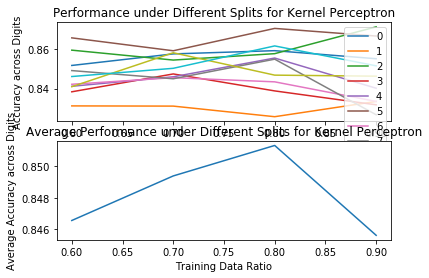

In [74]:
# Plot accuracy against ratio
# model: ker
# result: 0.8 global optimum

ITER = 200
p = 2
x_data = np.arange(0.6, 1.0, 0.1)
Y = np.zeros((len(x_data), 10))

for digit in range(10):
    print('digit =', digit)
    for i in range(len(x_data)):
        print('\tsplitting training data with ratio =', x_data[i])
        train_data, test_data = split(dataset, x_data[i])
        Y[i, digit] = perceptron_ker(train_data, test_data, ITER, digit, p)
    
f = plt.figure(1)
for digit in range(10):
    plt.plot(x_data, Y[:, digit], label = str(digit)) 
plt.legend(loc='upper right')
plt.xlabel('Training Data Ratio')
plt.ylabel('Accuracy across Digits')
plt.title('Performance under Different Splits for Kernel Perceptron')
plt.savefig('img/splits_ker_all.png')

g = plt.figure(2)
plt.plot(x_data, np.mean(Y, axis=1))
plt.xlabel('Training Data Ratio')
plt.ylabel('Average Accuracy across Digits')
plt.title('Average Performance under Different Splits for Kernel Perceptron')
plt.savefig('img/splits_ker.png')

In [ ]:
# Plot accuracy against number of iterations
# model: ker

RATIO = 0.8
x_data = np.arange(10, 800, 100)
Y = np.zeros((len(x_data), 10))

for i in range(len(x_data)):
    print('max iteration =', x_data[i])
    train_data, test_data = split(dataset, RATIO)
    for digit in range(10):
        print('\tdigit =', digit)
        Y[i, digit] = perceptron_ker(train_data, test_data, x_data[i], digit, p)

f = plt.figure(1)
for digit in range(10):
    plt.plot(x_data, Y[:, digit], label = str(digit)) 
plt.legend(loc='upper right')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy across Digits')
plt.title('Performance against Number of Iterations')
plt.savefig('img/iterations_ker_all.png')

g = plt.figure(2)
plt.plot(x_data, np.mean(Y, axis=1))
plt.xlabel('Number of Iterations')
plt.ylabel('Average Accuracy across Digits')
plt.title('Average Performance against Number of Iterations')
plt.savefig('img/iterations_ker.png')

max iteration = 10
	digit = 0
		finish building kernel
		test accuracy: 0.6974489795918367
	digit = 1
		finish building kernel
		test accuracy: 0.8846938775510204
	digit = 2
		finish building kernel
		test accuracy: 0.3780612244897959
	digit = 3
		finish building kernel
		test accuracy: 0.886734693877551
	digit = 4
		finish building kernel
		test accuracy: 0.7270408163265306
	digit = 5
		finish building kernel
		test accuracy: 0.4770408163265306
	digit = 6
		finish building kernel
		test accuracy: 0.9
	digit = 7
		finish building kernel
		test accuracy: 0.8877551020408163
	digit = 8
		finish building kernel
		test accuracy: 0.911734693877551
	digit = 9
		finish building kernel
		test accuracy: 0.9061224489795918
max iteration = 110
	digit = 0
		finish building kernel
		test accuracy: 0.8567787971457697
	digit = 1
		finish building kernel
		test accuracy: 0.8277268093781855
	digit = 2
		finish building kernel
		test accuracy: 0.8527013251783894
	digit = 3
		finish building kernel
		test

In [ ]:
# Plot accuracy against data size
# model: ker

ITER = 100
RATIO = 0.8
p = 2
thresholds = np.arange(1, len(dataset), 250)
x_data = []

Y = np.zeros((len(thresholds), 10))

for i in range(len(thresholds)):
    threshold = thresholds[i]
    print('threshold =', threshold)
    msk = np.random.rand(len(dataset[:threshold])) < ratio
    train_data = dataset[:threshold][msk] if len(dataset[:threshold][msk]) > 0 else []
    test_data = dataset[:threshold][~msk] if len(dataset[:threshold][~msk]) > 0 else []
    x_data.append(len(train_data))
    
    for digit in range(10):
        print('\tdigit =', digit)
        Y[i, digit] = perceptron_ker(train_data, test_data, ITER, digit, p)

        
f = plt.figure(1)
for digit in range(10):
    plt.plot(x_data, Y[:, digit], label = str(digit)) 
plt.legend(loc='upper right')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy across Digits')
plt.title('Learning Curve for Kernel Perceptron')
plt.savefig('img/learning_ker_all.png')

g = plt.figure(2)
plt.plot(x_data, np.mean(Y, axis=1))
plt.xlabel('Training Data Size')
plt.ylabel('Average Accuracy across Digits')
plt.title('Average Learning Curve for Kernel Perceptron')
plt.savefig('img/learning_ker.png')

In [ ]:
# Plot accuracy against kernel degree, p
# model: ker

ITER = 100
RATIO = 0.8
x_data = range(1,11)
Y = np.zeros((len(x_data), 10))

for i in range(len(x_data)):
    print('p =', x_data[i])
    train_data, test_data = split(dataset, RATIO)
    for digit in range(10):
        print('\tdigit =', digit)
        Y[i, digit] = perceptron_ker(train_data, test_data, ITER, digit, x_data[i])

f = plt.figure(1)
for digit in range(10):
    plt.plot(x_data, Y[:, digit], label = str(digit)) 
plt.legend(loc='upper right')
plt.xlabel('Degree of polynomial, p')
plt.ylabel('Accuracy across Digits')
plt.title('Performance against Degree')
plt.savefig('img/degree_ker_all.png')

g = plt.figure(2)
plt.plot(x_data, np.mean(Y, axis=1))
plt.xlabel('Degree of polynomial, p')
plt.ylabel('Average Accuracy across Digits')
plt.title('Average Performance against Degree')
plt.savefig('img/degree_ker.png')